# **Affects of the Coronavirus on the Hollywood Box Office**
## An analysis by Reilly Pratt
Published December 16, 2022

## BOX OFFICE TOTALS

## **1.	Introduction**
Since the early 1900’s, Film has been an artistic medium integral to our society. It is a means of entertainment, education, and even a way to explore social issues. It has been a fun event to share with the family, take someone on a date, or even go by yourself to enjoy a good movie. At the beginning of 2020, the world would soon the Coronavirus (COVID-19) – a horrible airborne infectious disease that caused several cities, states, and even countries worldwide to completely shut down. During this time the Hollywood Box Office plummeted 80% due to the lack of tickets being sold and movies being made. As many films sets and movie theaters were shut down to help slow the spread of the coronavirus. In this tutorial, I will analyze Domestic Box Office data from 1995 to 2022, available here, to show just how the Coronavirus pandemic affected the revenue of the domestic box office.


## **2.	Setting Things Up**
First, I will import all the libraries that I need to complete this project and be able to display and visualize my data. Throughout the semester we have made heavy use on libraries such as matplotlib and sklearn, as well as general libraries like numpy and pandas.


In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## **3.	Reading in the initial Data**
I will first read in the csv file of domestic box office data that I have downloaded. I want to take a look at what kind of data I am working with as well as whether or not I need to tidy up the data for the purpose of this tutorial.


In [65]:
df = pd.read_csv("Domestic_Box_Office.csv")
df

,Year,Tickets Sold,Total Box Office,Total Inflation\nAdjusted Box Office,Average\nTicket Price
0,2022,"830,832,193","$7,618,731,213","$7,618,731,213",$9.17
1,2021,"498,524,976","$4,571,475,410","$4,571,475,506",$9.17
2,2020,"221,763,304","$2,033,571,369","$2,033,571,369",$9.17
3,2019,"1,228,852,682","$11,256,293,172","$11,268,579,184",$9.16
4,2018,"1,311,294,542","$11,945,895,805","$12,024,570,957",$9.11
5,2017,"1,225,639,761","$10,993,991,460","$11,239,116,609",$8.97
6,2016,"1,302,556,379","$11,267,115,924","$11,944,442,006",$8.65
7,2015,"1,323,267,005","$11,155,143,861","$12,134,358,439",$8.43
8,2014,"1,257,220,182","$10,271,492,042","$11,528,709,079",$8.17
9,2013,"1,339,168,926","$10,887,446,341","$12,280,179,054",$8.13


The data is displayed in a 27x5 dataframe with fairly self explanatory column headings. These columns contain data for the year, total tickets sold, box office revenue, box office revenue adjusted for inflation, and average movie ticket price.


## **3A. Tidying the Data**
After viewing the data provided in the csv file, I have decided that for the purpose of this tutorial, I will only require the columns ‘Year’, ‘Tickers Sold’, ‘Total Box Office’. I will tidy up this data by dropping the last two columns.


In [66]:
df = df.drop(columns = ['Total Inflation\nAdjusted Box Office', 'Average\nTicket Price'])

The next thing that I noticed is that while trying to display the information in an easily viewable scatterplot, the data for Tickets Sold, and Box Office Revenue were formatted as Strings, so I had to change these values using the pandas function astype() to float values. 

In [67]:
df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

## **Displaying Data**

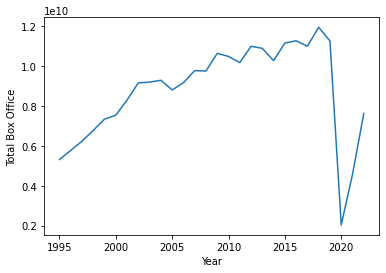

In [68]:
sns.lineplot(data=df, x="Year", y="Total Box Office")


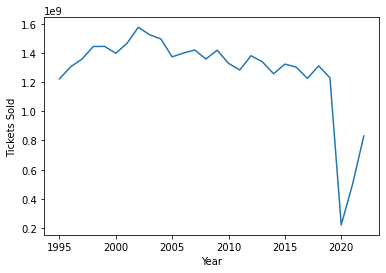

In [69]:
sns.lineplot(data=df, x="Year", y="Tickets Sold")

In the above plots, we can see that from 1995 to 1029, right before the pandemic, we had a fairly normal distribution of both total revenue and tickets sold, that is until 2020, 2021, and 2022 we can see there is a HUGE drop off.

## Linear Reression model

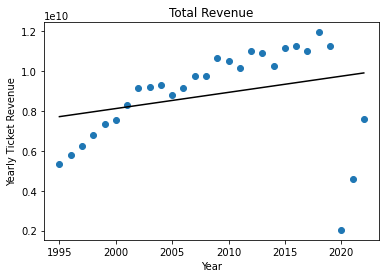

In [70]:
X = np.array(df['Year']).reshape(-1,1)
y = np.array(df['Total Box Office'])
reg = linear_model.LinearRegression().fit(X,y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='black')
plt.title("Total Revenue")
plt.xlabel("Year")
plt.ylabel("Yearly Ticket Revenue")
plt.show()

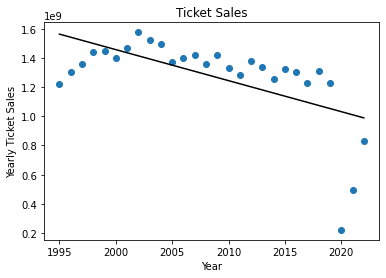

In [71]:
X = np.array(df['Year']).reshape(-1,1)
y = np.array(df['Tickets Sold'])
reg = linear_model.LinearRegression().fit(X,y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='black')
plt.title("Ticket Sales")
plt.xlabel("Year")
plt.ylabel("Yearly Ticket Sales")
plt.show()

In the above Linear Regression Models, you can see about the trajectory that the years 2020-2022 were predicted to have made or at least have been close to, but a closer look would show that they are far from the line.

Something interesting to note – although ticket sales have been slowly declining, total revenue has been steadily increasing -see graph
This is because ticket prices have more than DOUBLED since 1995.


Lets take a closer look.. rather than looking at the data year by year, let look at the data week by week leading up to the start of the pandemic. 

Below is a data set of the Box Office revenue from each week of the year in 2020.

In [72]:
wdf20 = pd.read_csv("Weekend_Box_Office2020.csv")
wdf20

,Weekend,No. 1 Movie,Weeks in Release,No. 1 Box Office Revenue,Combined Weekend Box Office Revenue
0,"Jan 3, 2020",Star Wars: The Rise of Skywalker,3,"$34,524,815","$142,211,507"
1,"Jan 10, 2020",1917,3,"$37,000,200","$132,949,218"
2,"Jan 17, 2020",Bad Boys For Life,New,"$62,504,105","$166,279,724"
3,"Jan 24, 2020",Bad Boys For Life,2,"$34,011,714","$120,946,679"
4,"Jan 31, 2020",Bad Boys For Life,3,"$17,682,959","$80,291,727"
5,"Feb 7, 2020",Birds of Prey (And the Fantabulous Em…,New,"$33,010,017","$95,398,633"
6,"Feb 14, 2020",Sonic The Hedgehog,New,"$58,018,348","$156,086,643"
7,"Feb 21, 2020",Sonic The Hedgehog,2,"$26,192,294","$102,423,969"
8,"Feb 28, 2020",The Invisible Man,New,"$28,205,665","$98,430,895"
9,"Mar 6, 2020",Onward,New,"$39,119,861","$100,656,444"


Formatting String data to Floats.

In [73]:
wdf20[wdf20.columns[3:]] = wdf20[wdf20.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

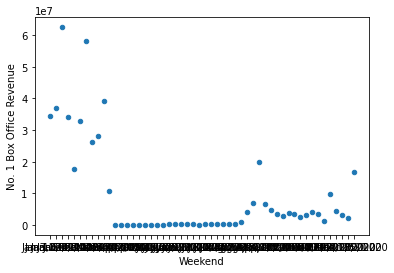

In [74]:
wdf20.plot.scatter(x='Weekend', y='No. 1 Box Office Revenue')

Below is a data set of the Box Office revenue from each week of the year in 2019.

In [75]:
wdf19 = pd.read_csv("Weekend_Box_Office2019.csv")
wdf19

,Weekend,No. 1 Movie,Weeks in Release,No. 1 Box Office Revenue,Combined Weekend Box Office Revenue
0,4-Jan-19,Aquaman,3,"$31,003,280","$138,556,524"
1,11-Jan-19,The Upside,New,"$20,355,000","$119,398,588"
2,18-Jan-19,Glass,New,"$40,328,920","$129,723,911"
3,25-Jan-19,Glass,2,"$18,884,440","$98,648,780"
4,1-Feb-19,Glass,3,"$9,548,795","$72,751,363"
5,8-Feb-19,The LEGO Movie 2: The Second Part,New,"$34,115,335","$114,126,668"
6,15-Feb-19,Alita: Battle Angel,New,"$28,525,613","$123,390,013"
7,22-Feb-19,How to Train Your Dragon: The Hidden …,New,"$55,022,245","$127,692,340"
8,1-Mar-19,How to Train Your Dragon: The Hidden …,2,"$30,028,540","$113,641,750"
9,8-Mar-19,Captain Marvel,New,"$153,433,423","$209,505,945"


Formatting String data to Floats.

In [78]:
wdf19[wdf19.columns[3:]] = wdf19[wdf19.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

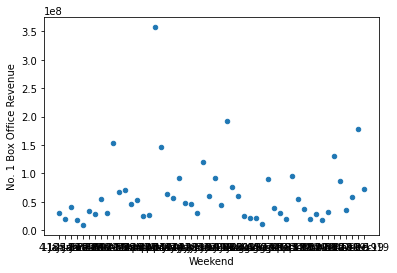

In [79]:
wdf19.plot.scatter(x='Weekend', y='No. 1 Box Office Revenue')

Now let's commbine these two data frames to give us one big picture of Box Office Revenue from 2019-2020.

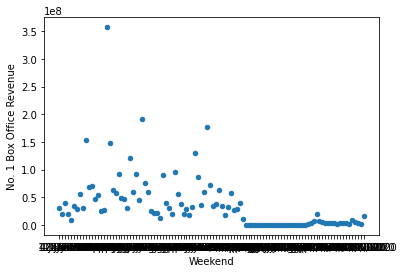

In [80]:
frames = [wdf19, wdf20]
result = pd.concat(frames)
result.plot.scatter(x='Weekend', y='No. 1 Box Office Revenue')

Now we see on our graph that the data nearly completely flatlines! Let's view these weeks a little closer with a bar graph.

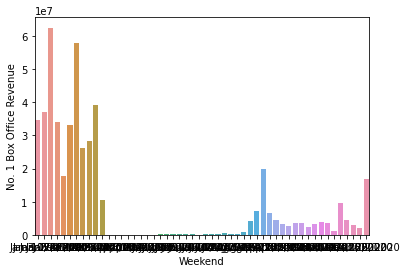

In [81]:
sns.barplot(data=wdf20, x="Weekend", y="No. 1 Box Office Revenue")

This bar plot of the weekend box office sales in 2020 shows just how dramatically the sales drop off week 12. This weekend was March 20 – Right around the time that the entire country began to shut down. The Revenue from week 11 to week 12 fell from 10 Million to a measly 33 thousand.

In [82]:
top2020 = pd.read_csv("2020Top10Grossing.csv")
top2020

,Rank,Title,Release Date,Company,Genre,Gross,Tickets Sold
0,1,Bad Boys for Life,17-Jan-20,Sony Pictures,Action,"$204,417,855","22,292,023"
1,2,1917,25-Dec-19,Universal,Thriller/Suspense,"$157,901,466","17,219,352"
2,3,Sonic The Hedgehog,14-Feb-20,Paramount Pictures,Adventure,"$146,066,470","15,928,731"
3,4,Jumanji: The Next Level,13-Dec-19,Sony Pictures,Adventure,"$124,736,710","13,602,694"
4,5,Star Wars: The Rise of Skyw…,20-Dec-19,Walt Disney,Adventure,"$124,496,308","13,576,478"
5,6,Birds of Prey (And the Fant…,7-Feb-20,Warner Bros.,Action,"$84,158,461","9,177,585"
6,7,Dolittle,17-Jan-20,Universal,Adventure,"$77,047,065","8,402,079"
7,8,The Invisible Man,28-Feb-20,Universal,Horror,"$64,914,050","7,078,958"
8,9,The Call of the Wild,21-Feb-20,20th Century Studios,Adventure,"$62,342,368","6,798,513"
9,10,Onward,6-Mar-20,Walt Disney,Adventure,"$61,555,145","6,712,665"


Above are the Top 10 grossing movies in 2020. There are quite a few things that really stand out to me, but the biggest thing that jumps out here is the fact that 3 of the top 5 grossing movies in 2020 actually released in 2019!!! It is important to note this because these revenues were mostly accumulated in the months of January and February. After that most movies really fell off.

In [83]:
top2020[top2020.columns[5:]] = top2020[top2020.columns[5:]].replace('[\$,]', '', regex=True).astype(float)

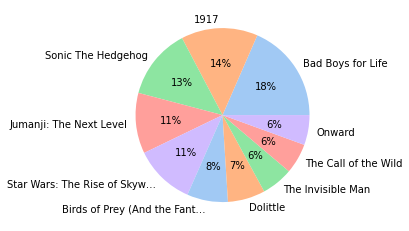

In [84]:
gross = top2020['Gross']
labels = top2020['Title']
colors = sns.color_palette('pastel')[0:5]
plt.pie(gross, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Here I've represented the top grossing movies of 2020 with a pie chart to show that most of these total gross revenues are fairly similar to eachother, but in comparison to previous years they are DRAMATICALLY smaller.

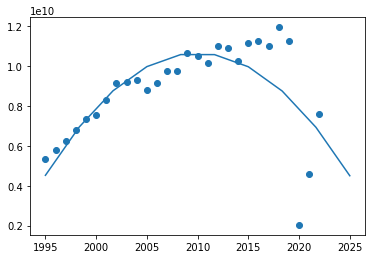

In [125]:
X = df[['Year']]
X = X-1995
y = df['Total Box Office']
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(poly_X,y)
coefs = poly_model.coef_
years = np.linspace(0, 30, 10).reshape(-1, 1)
poly_years = poly.fit_transform(years)
years = years+1995
predictions = poly_model.predict(poly_years)

plt.plot(years, predictions)
plt.scatter(y=df["Total Box Office"], x=df["Year"])

According to my linear progression chart, the Hollywood Box Office would be on track to completely Zero Out by 2030. This is obviously if you include the last couple years and assume the next years will be similar. 

### **CONCLUSION**
In this tutorial I have used various sets of data and models to display just how devastating the Coronavirus of 202 was for the Hollywood Box Office revenue. There are many other factors that are not qualifiable - for instance, when the world shut down after the spread of the coronavirus, many of the films that were in production at the time had to get postponed so while yes the total revenue made in the years 2020-2022 was significantly lower, the number of movies released each year also significantly dropped off as a result of a number of big movies being put on hold. The good news for Hollywood is that While many of these movies have been put on hold, they are lining up to be released one after the other soon in what I believe will create a major boom for the Film industry - having several high quality movies being released one after the other. 

All csv files can be found at https://github.com/rybodude/rybodude.github.io